In [1]:
import pickle as pkl
import pk_plot_library as pplib
import numpy as np
import matplotlib.pyplot as plt
from colossus.cosmology import cosmology
cosmo = cosmology.setCosmology('planck18')

pplib.imports()
# WEBPATH = '/Users/cosinga/code/calvinosinga.github.io/hicolor/sup_analysis/'
DRAFTPATH = '/Users/cosinga/overleaf/hi_cosmo/figures/'

In [2]:
ds = pkl.load(open('/Users/cosinga/code/hcolor/fig_md_analysis/5-18_pkdatasort.pkl', 'rb'))
print(ds.getAttrs())

ds.tickArgs(direction = 'in', right = True, top = True, labelsize = 14)
ds.legendArgs(frameon = False, loc = 'upper right', fontsize = 14, slc = (-1, -1))

ds.axisLabelArgs('both', fontsize = 16)
ds.rowLabelArgs(pos = [0.05, 0.05], fontsize = 16, ha = 'left', va = 'bottom')
ds.colLabelArgs(pos = [0.5, 0.95], fontsize = 16, ha = 'center' , va = 'top')
ds.axisArgs(xscale = 'log', yscale = 'log', xlim = [0.11866199299595938, 20])

ds.setOrder('space', ['real', 'redshift', 'rsd'])

ds.displayAs('space', ['real', 'redshift', 'rsd'], ['Real Space', 'Redshift Space', 'Redshift Space\nDistortions'])
ds.displayAs('snapshot', [99, 67, 50], ['z = 0.0', 'z = 0.5', 'z = 1.0'])
# ds.displayAs('color', ['blue', 'red', 'resolved'], 
#              ['HI $\\times$ Blue Bias', 'HI $\\times$ Red Bias', 'HI $\\times$ Galaxy Bias'])
ds.displayAs('HI_fieldname', ['hisubhalo', 'vn', 'hiptl'], ['Galaxy Centers', 'All Particles', 'Particles in Galaxies'])

ds.setColors('HI_fieldname', ['firebrick', 'saddlebrown', 'sandybrown'], ['vn', 'hiptl', 'hisubhalo'])
ds.setColors('color', ['red', 'blue', 'gray'], ['red', 'blue', 'resolved'])

ds.setXLabel(pplib.wnum())
ds.getAttrVals('post_process')

['path', 'result_type', 'result_runtime', 'is_auto', 'box', 'simname', 'sim_resolution', 'num_part', 'grid_resolution', 'snapshot', 'redshift', 'axis', 'fieldname', 'is_hydrogen', 'is_atomic', 'is_molecular', 'is_particle', 'is_groupcat', 'is_matter', 'mas', 'space', 'compute_xi', 'compute_slice', 'color', 'gal_species', 'gal_res', 'color_cut', 'ptl_species', 'map', 'model', 'HI_fieldname', 'projection', 'HI_res', 'censat', 'post_process', 'numerator', 'denominator']


['no key found', 'theory_bias', 'obs_bias', 'corr_coef']

In [3]:
from figrid.data_container import DataContainer
ptlip = {'fieldname':'ptl', 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 'ptl_species':'ptl',
         'mas':'CICW', 'path':'fiducial', 'simname':'tng100'}
galip = {'color_cut':'None', 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 'axis':0, 'grid_resolution':800,
      'censat':['no key found', 'both'], 'mas':'CICW', 'color': 'resolved', 'fieldname':'galaxy',
     'path':'fiducial', 'simname':'tng100'}
resolved_biases = []
for s in ds.getAttrVals('snapshot'):
    for rss in ['real', 'redshift']:
        
        ptlip['snapshot'] = s
        galip['snapshot'] = s
        ptlip['space'] = rss
        galip['space'] = rss
        ptls = ds.getMatching(ptlip)
        gals = ds.getMatching(galip)
        if len(ptls) > 1:
            ds.printMatching(ptlip)

        if len(gals) > 1:
            ds.printMatching(galip)

        xdata = ptls[0].getData()[0]
        ydata = gals[0].getData()[1]/ ptls[0].getData()[1]
        ydata = np.sqrt(ydata)
        dc = DataContainer([xdata, ydata])
        dc.update(ptlip)
        dc.update(galip)
        dc.update({'censat':'both'})
        dc.add('post_process', 'obs_bias')
        dc.add('is_auto', False)
        dc.add('denominator', 'ptl')
        dc.add('numerator', 'galaxy')
        resolved_biases.append(dc)


ds.extend(resolved_biases)
    

In [4]:
SIM = 'tng300'
if SIM == 'tng100':
    BHI = [0.78, 1.11, 1.43]
    BRED = [1.88, 2.23, 2.78]
    BBLUE = [1.1, 1.64, 1.99]
    BGAL = [1.54, 1.80, 2.11]
elif SIM == 'tng300':
    BHI = [0.765, np.nan, 1.30]
    BRED = [1.66, np.nan, 2.61]
    BBLUE = [0.93, np.nan, 1.74]
    BGAL = [1.46, np.nan, 2.04]
zs = np.linspace(0, 1, 100)
d_plus = cosmo.growthFactor(zs)

def passive(bias, start = 1):
    
    return 1 + (bias[-1] - 1) * d_plus[-1] / d_plus

bhi_passive = passive(BHI)
bred_passive = passive(BRED)
bblue_passive = passive(BBLUE)
bgal_passive = passive(BGAL)


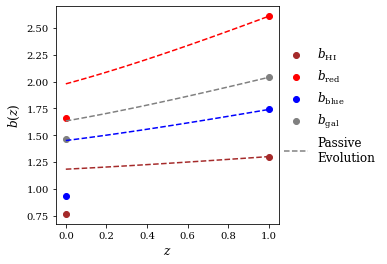

In [5]:
plt.figure(figsize = (4, 4))
snapshot_zs = [0, 0.5, 1]
plt.scatter(snapshot_zs, BHI, label = '$b_{\\mathrm{HI}}$', color = 'brown')
plt.scatter(snapshot_zs, BRED, label = '$b_{\\mathrm{red}}$',color = 'red')
plt.scatter(snapshot_zs, BBLUE, label = '$b_{\\mathrm{blue}}$',color = 'blue')
plt.scatter(snapshot_zs, BGAL, label = '$b_{\\mathrm{gal}}$', color = 'gray')

plt.plot(zs, bhi_passive,  linestyle = 'dashed', color = 'brown')
plt.plot(zs, bblue_passive,  linestyle = 'dashed', color = 'blue')
plt.plot(zs, bred_passive,  linestyle = 'dashed', color = 'red')
plt.plot(zs, bgal_passive, label = 'Passive\nEvolution', linestyle = 'dashed', color = 'gray')
plt.legend(loc = (1, 0.25), frameon = False, fontsize = 12)
plt.ylabel('$b (z)$', fontsize = 12)

plt.xlabel('$z$', fontsize = 12)

plt.savefig(DRAFTPATH + "passive_evo_placeholder.png", dpi = 400, bbox_inches = 'tight')

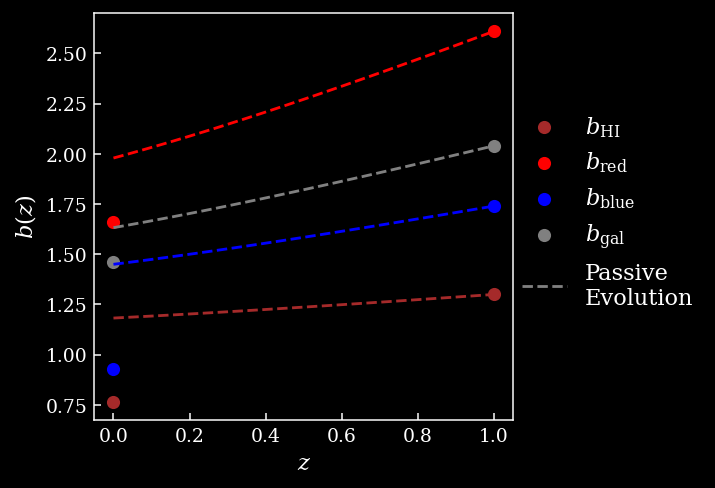

In [8]:
plt.figure(figsize = (4, 4), dpi = 135)
snapshot_zs = [0, 0.5, 1]
plt.scatter(snapshot_zs, BHI, label = '$b_{\\mathrm{HI}}$', color = 'brown')
plt.scatter(snapshot_zs, BRED, label = '$b_{\\mathrm{red}}$',color = 'red')
plt.scatter(snapshot_zs, BBLUE, label = '$b_{\\mathrm{blue}}$',color = 'blue')
plt.scatter(snapshot_zs, BGAL, label = '$b_{\\mathrm{gal}}$', color = 'gray')

plt.plot(zs, bhi_passive,  linestyle = 'dashed', color = 'brown')
plt.plot(zs, bblue_passive,  linestyle = 'dashed', color = 'blue')
plt.plot(zs, bred_passive,  linestyle = 'dashed', color = 'red')
plt.plot(zs, bgal_passive, label = 'Passive\nEvolution', linestyle = 'dashed', color = 'gray')
plt.legend(loc = (1, 0.25), frameon = False, fontsize = 12, labelcolor = 'white')
plt.ylabel('$b (z)$', fontsize = 12, color = 'white')

plt.xlabel('$z$', fontsize = 12, color = 'white')

fig = plt.gcf()
fig.set_facecolor('black')
ax = plt.gca()
ax.set_facecolor('black')
for spine in ax.spines.values():
    spine.set_color('white')
ax.tick_params(which = 'both', colors = 'white', direction = 'in')

Text(0, 0.5, 'Percent Error')

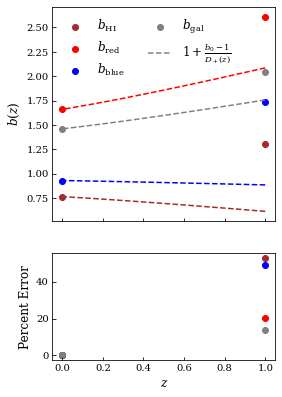

In [40]:
fig, axes = plt.subplots(2, 1, sharex = True, gridspec_kw = dict(height_ratios = [1, 0.5]), figsize = (4, 6.5))
plt.sca(axes[0])
axes[0].tick_params(direction = 'in', which = 'both')
axes[1].tick_params(direction = 'in', which = 'both')

snapshot_zs = [0, 0.5, 1]
plt.scatter(snapshot_zs, BHI, label = '$b_{\\mathrm{HI}}$', color = 'brown')
plt.scatter(snapshot_zs, BRED, label = '$b_{\\mathrm{red}}$',color = 'red')
plt.scatter(snapshot_zs, BBLUE, label = '$b_{\\mathrm{blue}}$',color = 'blue')
plt.scatter(snapshot_zs, BGAL, label = '$b_{\\mathrm{gal}}$', color = 'gray')

plt.plot(zs, bhi_passive,  linestyle = 'dashed', color = 'brown')
plt.plot(zs, bblue_passive,  linestyle = 'dashed', color = 'blue')
plt.plot(zs, bred_passive,  linestyle = 'dashed', color = 'red')
plt.plot(zs, bgal_passive, label = r'$1 + \frac{b_0 - 1}{D_+(z)}$', linestyle = 'dashed', color = 'gray')
plt.legend(loc = 'upper left', frameon = False, ncol = 2, fontsize = 12)
plt.ylabel('$b (z)$', fontsize = 12)

plt.sca(axes[1])

def calc_dif(passive, actual):
    snap_zs = snapshot_zs
    vals = []
    for i in range(len(actual)):
        if actual[i] == np.nan:
            vals.append(np.nan)
        else:           
            zidx = np.argmin(abs(snap_zs[i] - zs))
            dif = abs(actual[i] - passive[zidx])
            vals.append(dif / actual[i] * 100)
    return vals
plt.scatter(snapshot_zs, calc_dif(bhi_passive, BHI), color = 'brown')
plt.scatter(snapshot_zs, calc_dif(bblue_passive, BBLUE), color = 'blue')
plt.scatter(snapshot_zs, calc_dif(bred_passive, BRED), color = 'red')
plt.scatter(snapshot_zs, calc_dif(bgal_passive, BGAL), color = 'gray')

plt.xlabel('$z$', fontsize = 12)
plt.ylabel('Percent Error', fontsize = 12)